In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score

### Read data

In [655]:
wine_df = pd.read_csv('dataset/winequality-red.csv')

In [656]:
wine_df.shape

(1599, 12)

In [657]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [658]:
wine_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [659]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Check null

In [660]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Check duplicate

In [661]:
wine_df.duplicated().sum()

240

In [662]:
wine_df = wine_df.drop_duplicates()

### Check corr between features

<AxesSubplot:>

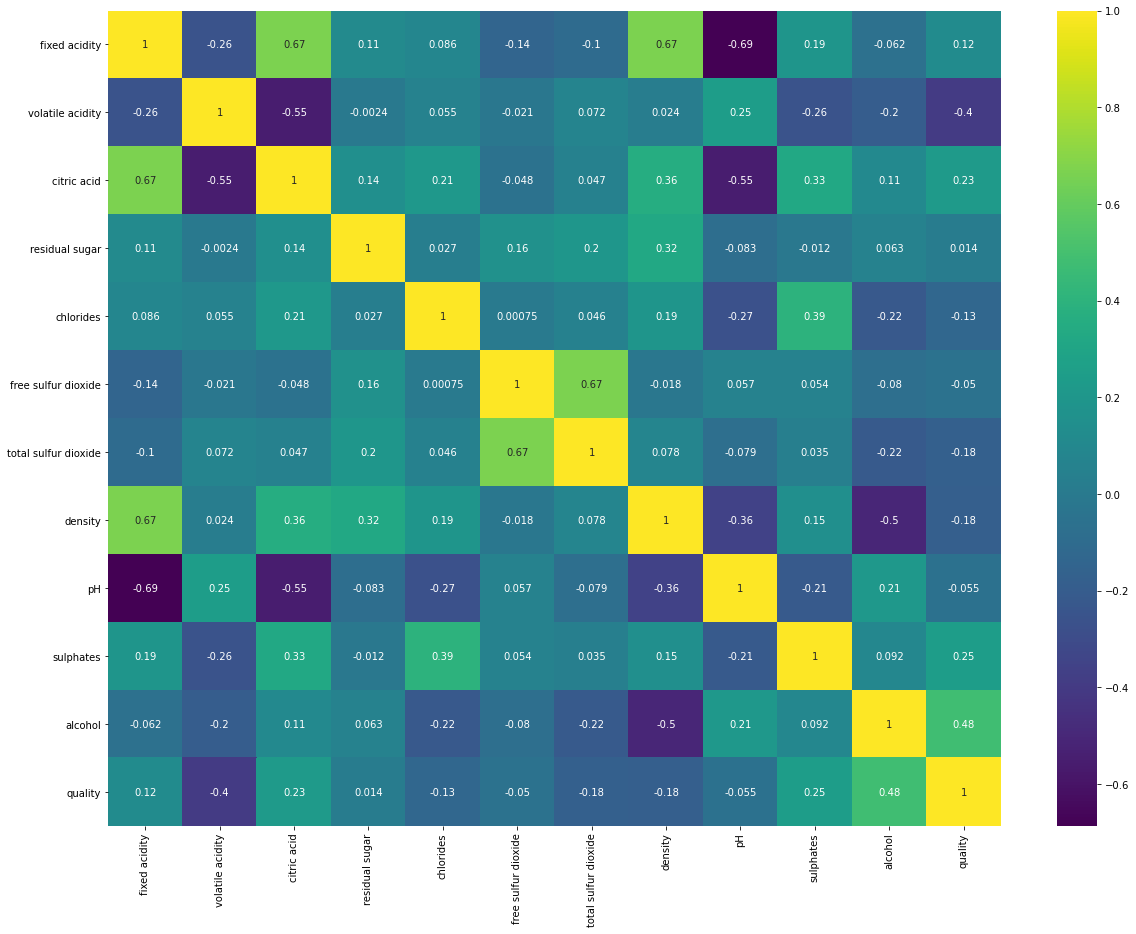

In [663]:
plt.figure(figsize=(20,15))
sns.heatmap(wine_df.corr(),annot=True, cmap='viridis')

### Convert label into binary problem

In [664]:
wine_df['quality'] = [1 if x > 5 else 0 for x in wine_df['quality']]

### Check data distribution by label

In [665]:
wine_df['quality'].value_counts()

1    719
0    640
Name: quality, dtype: int64

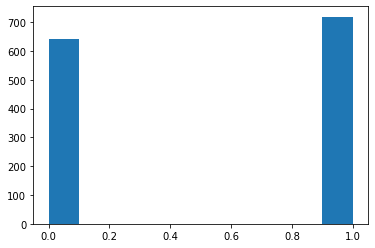

In [666]:
# wine_df['quality'].plot.hist()
plt.hist(wine_df['quality'])
plt.show()

### Split data into 2 part

In [667]:
wine_part_1 = wine_df[wine_df['alcohol'] <= 11]
wine_part_2 = wine_df[wine_df['alcohol'] > 11]

In [668]:
wine_part_1.shape

(1001, 12)

In [669]:
wine_part_2.shape

(358, 12)

In [670]:
wine_part_1['quality'].value_counts()

0    585
1    416
Name: quality, dtype: int64

### Split data of part 1

In [671]:
features_1 = wine_part_1.drop('quality', axis=1)

In [672]:
labels_1 = wine_part_1[['quality']]

In [673]:
X_train, X_test, y_train, y_test = train_test_split(features_1, labels_1, test_size=0.2, random_state=42)

### Check data distribution between train set, test set of part 1

In [674]:
df_train = pd.DataFrame(X_train, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])
df_test = pd.DataFrame(X_test, columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

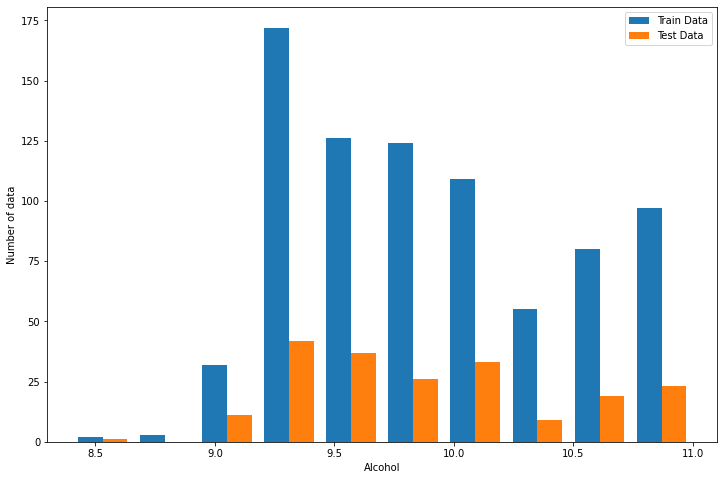

In [686]:
plt.figure(figsize=(12,8))
plt.hist([df_train['alcohol'], df_test['alcohol']])
plt.legend(['Train Data', 'Test Data'], loc=0)
plt.xlabel('Alcohol')
plt.ylabel('Number of data')
plt.show()

### Check data distribution between between part 1 and part 2

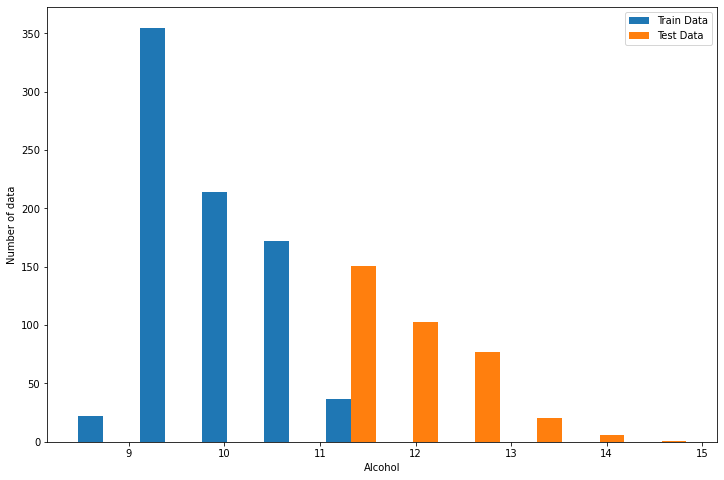

In [687]:
plt.figure(figsize=(12,8))
plt.hist([df_train['alcohol'], wine_part_2['alcohol']])
plt.legend(['Train Data', 'Test Data'], loc=0)
plt.xlabel('Alcohol')
plt.ylabel('Number of data')
plt.show()

### Normalize data before training model

In [677]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Create model

In [678]:
model = RandomForestClassifier(random_state=1, max_depth=7)
model.fit(X_train, y_train)

/home/sunt/anaconda3/envs/ml/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=7, random_state=1)

### Test model on 20% of data in part 1

In [679]:
model.score(X_test, y_test)

0.6915422885572139

In [680]:
pred = model.predict(X_test)
print(f1_score(y_test, pred, average='macro'))
print(confusion_matrix(y_test, pred))

0.6767482880265616
[[91 25]
 [37 48]]


### Test model on part 2

In [681]:
features_2 = wine_part_2.drop('quality', axis=1)

In [682]:
labels_2 = wine_part_2[['quality']]

In [683]:
model.score(features_2, labels_2)

0.24860335195530725

In [684]:
pred_2 = model.predict(features_2)
print(f1_score(labels_2, pred_2, average='macro'))
print(confusion_matrix(labels_2, pred_2))

0.24728190778417838
[[ 52   3]
 [266  37]]
